**D3APL: Aplicações em Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Animal Dataset - v2
We will evaluate some **multiclass classification** CNNs to predict the classes of the **Animal Dataset**: https://www.kaggle.com/datasets/alessiocorrado99/animals10


Target goals:
- Data Augmentation

## 1. Set up

#### 1.1 TensorFlow

In [1]:
import tensorflow as tf

2023-05-04 21:21:43.866598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 21:21:44.498919: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
tf.__version__

'2.12.0'

**GPU available?**

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-05-04 21:21:45.186065: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 21:21:45.203837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 21:21:45.204023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

### 1.2 Fixing the seed for reproducibility (optional)
That's a try for reprodubility in Keras. See more on:
- https://stackoverflow.com/a/59076062
- https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [4]:
import os
import tensorflow as tf
import numpy as np
import random

def reset_random_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    
# make some random data
reset_random_seeds()

### 1.3. Dataset
**Animal Dataset**: https://www.kaggle.com/datasets/alessiocorrado99/animals10

#### 1.3.1 Load the preprocessed dataset
**Preprocessed dataset**: _'../datasets/animals-dataset/preprocessed/'_

In [5]:
import numpy as np

In [6]:
X_train = np.load('../datasets/animals-dataset/preprocessed/train_data_64x64x3.npy')
y_train = np.load('../datasets/animals-dataset/preprocessed/train_labels.npy')

X_val = np.load('../datasets/animals-dataset/preprocessed/validation_data_64x64x3.npy')
y_val = np.load('../datasets/animals-dataset/preprocessed/validation_labels.npy')

X_test = np.load('../datasets/animals-dataset/preprocessed/test_data_64x64x3.npy')
y_test = np.load('../datasets/animals-dataset/preprocessed/test_labels.npy')

In [7]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}\n')

print(f'X_val.shape: {X_val.shape}')
print(f'y_val.shape: {y_val.shape}\n')

print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (6400, 64, 64, 3)
y_train.shape: (6400,)

X_val.shape: (1600, 64, 64, 3)
y_val.shape: (1600,)

X_test.shape: (2000, 64, 64, 3)
y_test.shape: (2000,)


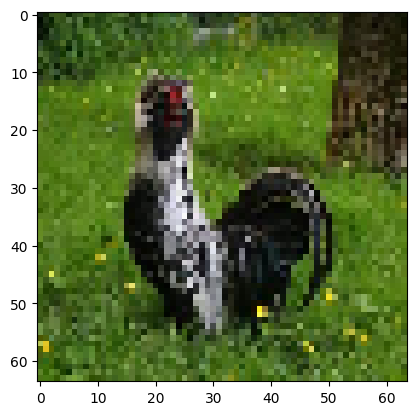

In [8]:
# show a training image sample
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

## 2. Building and Training a CNN via Keras

### 2.1 Data Augmentation
https://www.tensorflow.org/tutorials/images/data_augmentation

A **regularization method** that _perturbs_ training examples, _changing their appearance slightly_, before passing them into the network for training.

Data augmentation _artificially_ **increases** the size of the _training set_ by generating many _realistic variants_ of each _training instance_. <br/>
This _reduces overfitting_, making this a **regularization technique**. <br/>
The _generated instances_ should be as _realistic as possible_: ideally, given an image from the augmented training set, a human should not be able to tell whether it was augmented or not. 

The end result is that a _network_ consistently sees **“new” training data examples** generated from the _original training data_, partially alleviating the need for us to gather more training data (though in general, gathering more training data will rarely hurt your algorithm).

Common data augmentation techniques involve applying simple **geometric transformations** such as:
1. Translations
2. Rotations
3. Changes in scale
4. Shearing
5. Horizontal (and in some cases, vertical) flip

<img src='./figs/data_augmentation.png' width=800 />

https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

**IMPORTANT:** Applying a _(small) amount of these transformations_ to an input image will _change its **appearance** slightly_, but **IT DOES NOT CHANGE** the _class label_.

#### **A simple Example**

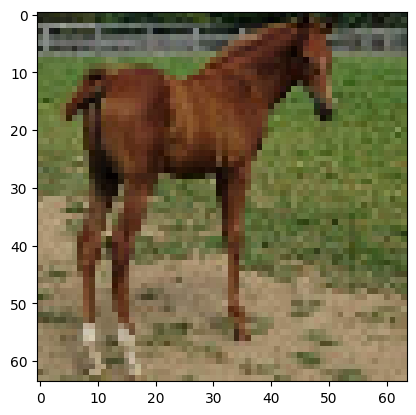

In [9]:
# get an image sample from the database
img = X_train[1]

plt.imshow(img)

In [10]:
img.shape

(64, 64, 3)

In [11]:
# Reshape the input image to have an extra dimension ==> this is required by Keras data augmentation methods
# the first dimension will be the the total number of images which will be processed by Keras Data Augmentation
print(f'Shape before: {img.shape}')

img = np.expand_dims(img, axis=0)

print(f'Shape after: {img.shape}')

Shape before: (64, 64, 3)
Shape after: (1, 64, 64, 3)


In [12]:
# A data augmentation "model" with only changes in Rotation.
# We’ll allow our input images to be randomly rotated ± 30 degrees

from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation


# Randomly flips images horizontally during training.
# Randomly rotates images during TRAINING (not in the inference time).
# Factor indicates the interval in which the rotation angle can be. In this case: [-10% * 2pi, 10% * 2pi] = [-36°, +36°] 
# The input shape to this model is: (..., height, width, channels)
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(factor=0.1, fill_mode='constant')
])

2023-05-04 21:21:46.093348: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 21:21:46.093796: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-04 21:21:46.094066: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

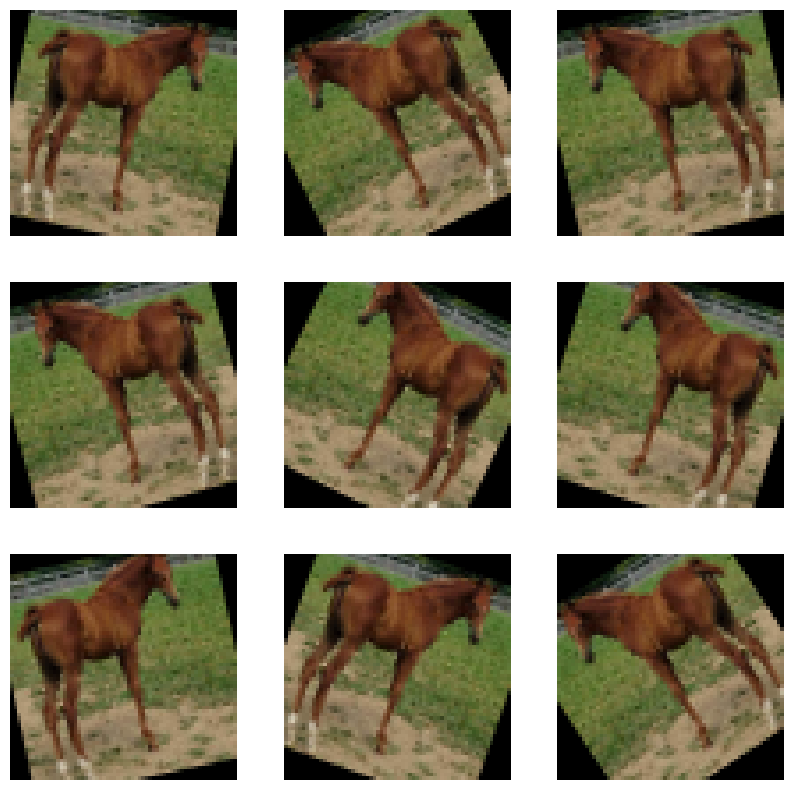

In [13]:
# let's generate for new images by data augmentation

plt.figure(figsize=(10, 10))

for i in range(9):
    augmented_img = data_augmentation(img)
    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_img[0])
    plt.axis("off")

In [14]:
# A data augmentation "model" with only changes in Rotation.
# We’ll allow our input images to be randomly rotated ± 30 degrees

from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomRotation


# Randomly flips images horizontally during training.
# Randomly rotates images during TRAINING (not in the inference time).
# Factor indicates the interval in which the rotation angle can be. In this case: [-10% * 2pi, 10% * 2pi] = [-36°, +36°] 
# The input shape to this model is: (..., height, width, channels)
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(factor=0.1, fill_mode='reflect')
])

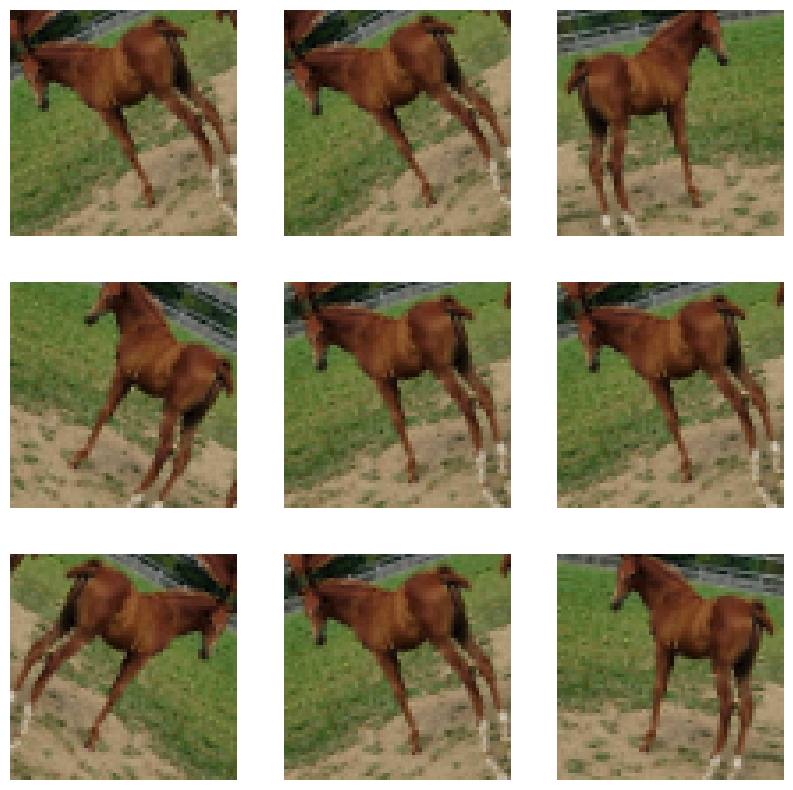

In [15]:
# let's generate for new images by data augmentation

plt.figure(figsize=(10, 10))

for i in range(9):
    augmented_img = data_augmentation(img)
    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_img[0])
    plt.axis("off")

#### **A more complex example**

In [16]:
# get a batch of 2 images
X_train_batch = X_train[[0, 10]]

X_train_batch.shape

(2, 64, 64, 3)

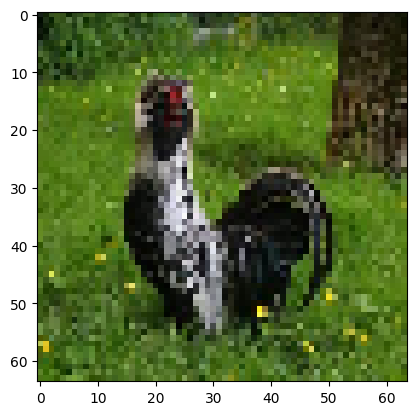

In [17]:
plt.imshow(X_train_batch[0])

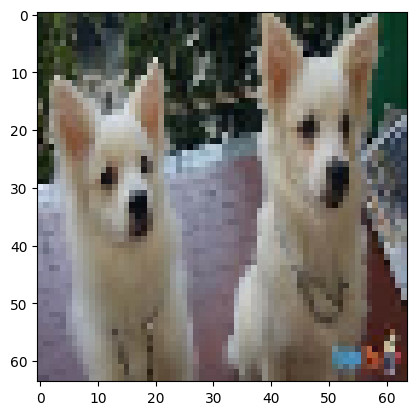

In [18]:
plt.imshow(X_train_batch[1])

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(factor=0.1),
    RandomTranslation(height_factor=0.1, width_factor=0.1)
])

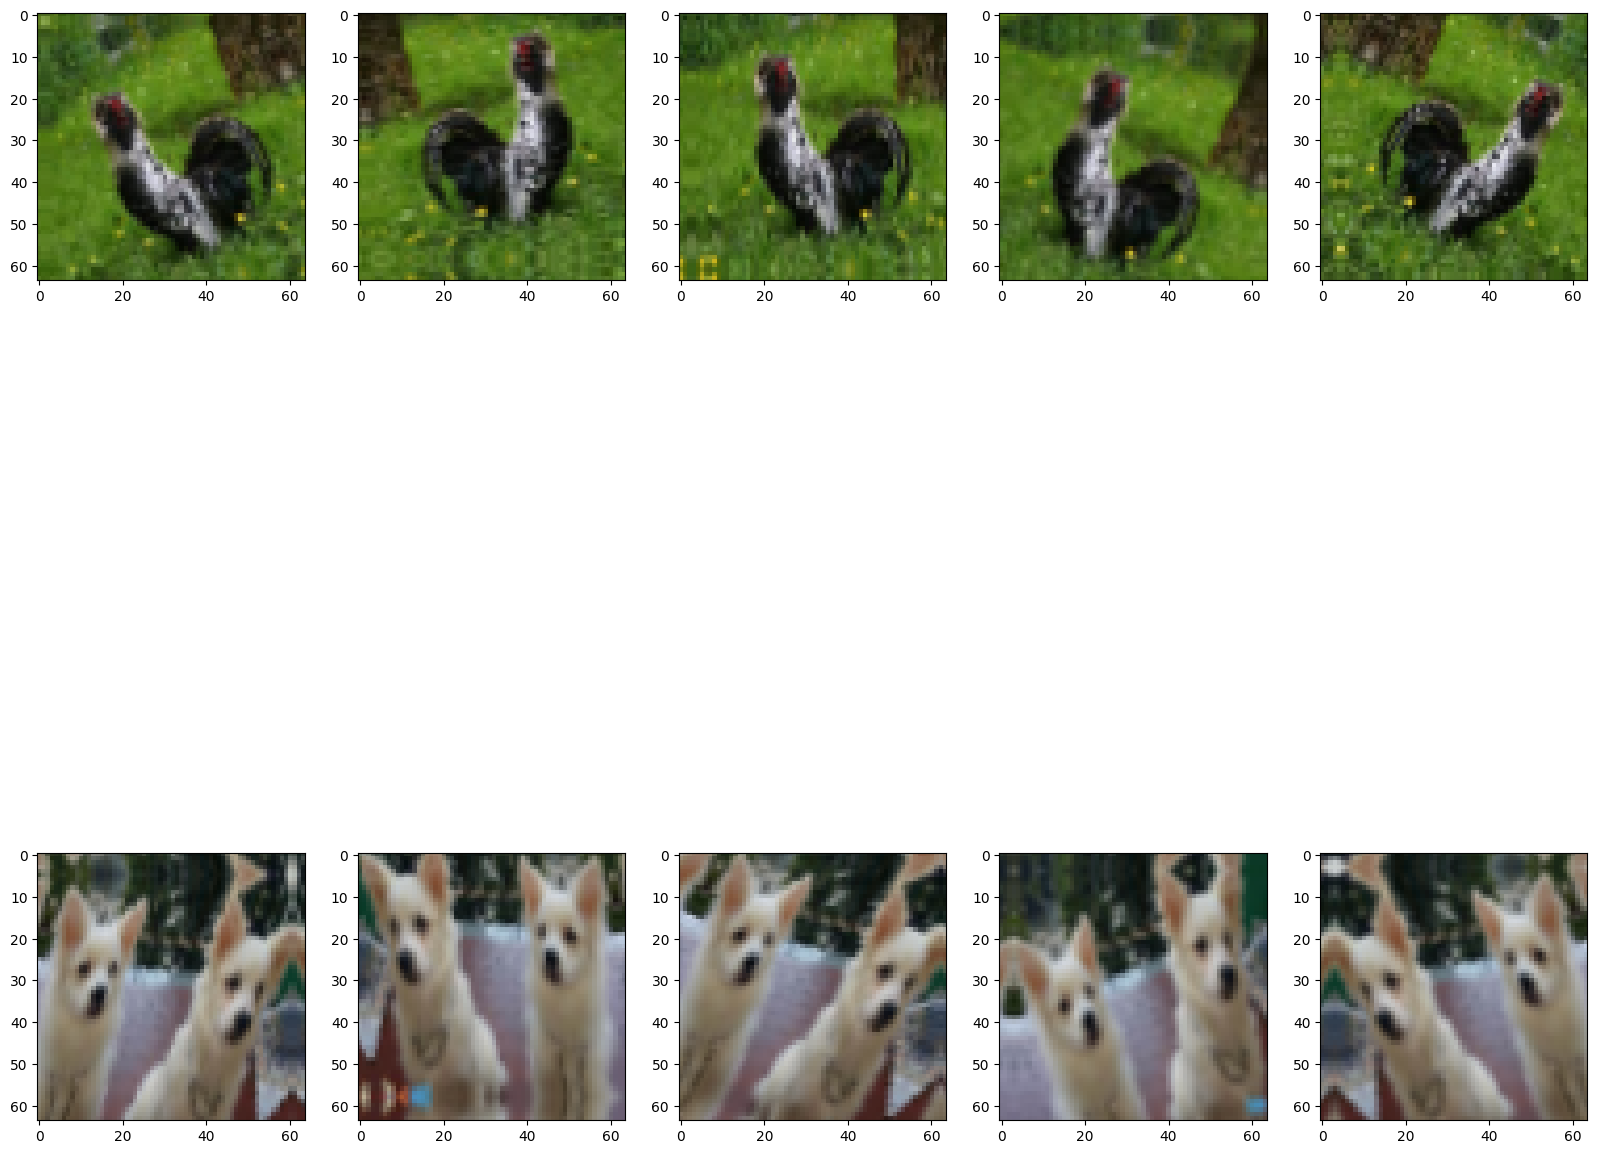

In [20]:
fig, axs = plt.subplots(2, 5, figsize=(20, 20))

for i in range(5):
    augmented_X_batch = data_augmentation(X_train_batch)

    axs[0, i].imshow(augmented_X_batch[0])
    axs[1, i].imshow(augmented_X_batch[1])

### 2.2 Defining the Network Architecture
The simplest way to use the Keras preprocessing layers is making the _preprocessing layers_ **part of your model**: <br/>
https://www.tensorflow.org/tutorials/images/data_augmentation#option_1_make_the_preprocessing_layers_part_of_your_model


That's a simple CNN for _Multiclass Classification_:
- INPUT [64x64x3]
- **PREPROCESSING LAYERS**
- CONV [32, 4x4x3, 'valid']
- RELU
- MAX_POOL [2x2, stride=(1,1)]
- CONV [32, 4x4x3, 'valid']
- RELU => MAX_POOL [2x2, stride=(1,1)]
- FLATTEN
- FC [256]
- RELU => FC [10, 'softmax']  # number of classes

- optimizer: SGD with `learning_rate=0.01`
- kernel_initializer: "glorot_uniform"
- bias_initializer: "zeros"
- **Early stopping**

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation

def build_cnn(input_shape, n_classes):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        
        # data augmentation layers
        RandomFlip("horizontal"),
        RandomRotation(factor=0.1),
        RandomTranslation(height_factor=0.1, width_factor=0.1),
        
        # CNN
        Conv2D(filters=32, kernel_size=(4,4), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Conv2D(filters=32, kernel_size=(4,4), activation='relu'),
        MaxPool2D(pool_size=(2,2)),

        Flatten(),

        Dense(256, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    
    return model

In [22]:
input_shape = (64, 64, 3)
n_classes = np.unique(y_train).size

model = build_cnn(input_shape, n_classes)
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 64, 64, 3)         0         
                                                                 
 random_rotation_3 (RandomRo  (None, 64, 64, 3)        0         
 tation)                                                         
                                                                 
 random_translation_1 (Rando  (None, 64, 64, 3)        0         
 mTranslation)                                                   
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                      

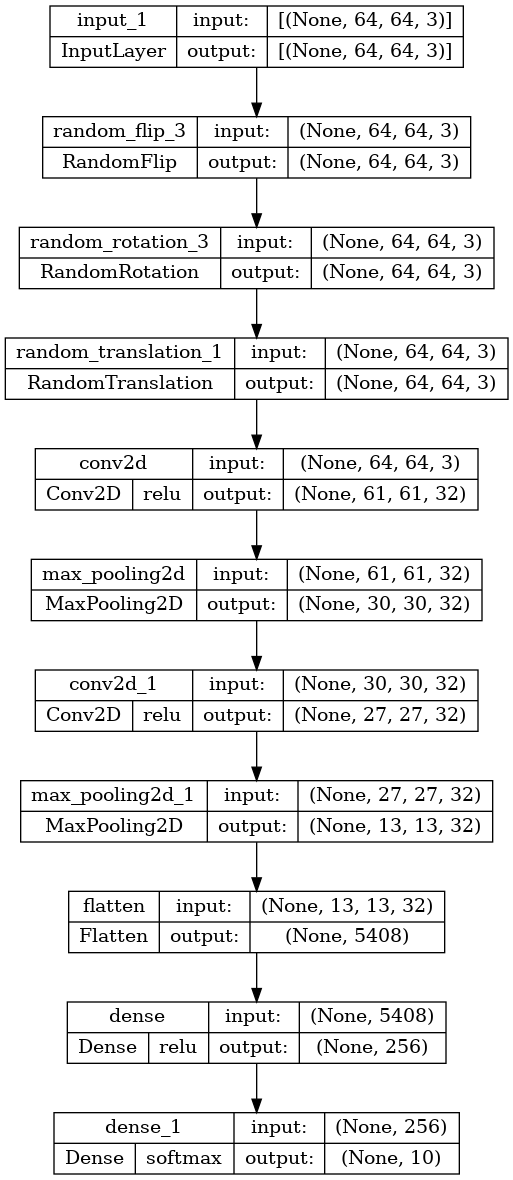

In [24]:
from tensorflow.keras.utils import plot_model
# vertical
plot_model(model, show_shapes=True, show_layer_activations=True)

##### **Observations**

- **Data augmentation** will run on-device, synchronously with the rest of your layers, and benefit from _GPU acceleration_.
- **Data augmentation** is **inactive at test time (inference time)** so input images will _only_ be augmented during calls to `Model.fit` (**not** `Model.evaluate` or `Model.predict`).

### 2.3 Training with Early Stopping

In case of GPU drivers, we can monitor its use by [_gpustat_](https://github.com/wookayin/gpustat).

On terminal, use: `gpustat -cpi`


In [25]:
X_train.shape

(6400, 64, 64, 3)

In [26]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [27]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])

Epoch 1/100


2023-05-04 21:21:53.017200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-04 21:21:53.425426: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7eff7791e3d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-04 21:21:53.425452: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA TITAN Xp, Compute Capability 6.1
2023-05-04 21:21:53.479046: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 [==============================] - 3s 5ms/step - loss: 2.2899 - accuracy: 0.1338 - val_loss: 2.2587 - val_accuracy: 0.1700
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 2.2491 - accuracy: 0.1641 - val_loss: 2.2059 - val_accuracy: 0.1925
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 2.2012 - accuracy: 0.1969 - val_loss: 2.1536 - val_accuracy: 0.2019
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 2.1511 - accuracy: 0.2173 - val_loss: 2.1279 - val_accuracy: 0.2019
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 2.1008 - accuracy: 0.2309 - val_loss: 2.0898 - val_accuracy: 0.2212
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 2.0621 - accuracy: 0.2498 - val_loss: 1.9870 - val_accuracy: 0.2869
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 2.0252 - accuracy: 0.2691 - val_loss: 1.9622 - val_accuracy: 0.3044
Epoch 8/100

#### **Visualizing the training history**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

Text(0, 0.5, 'Score')

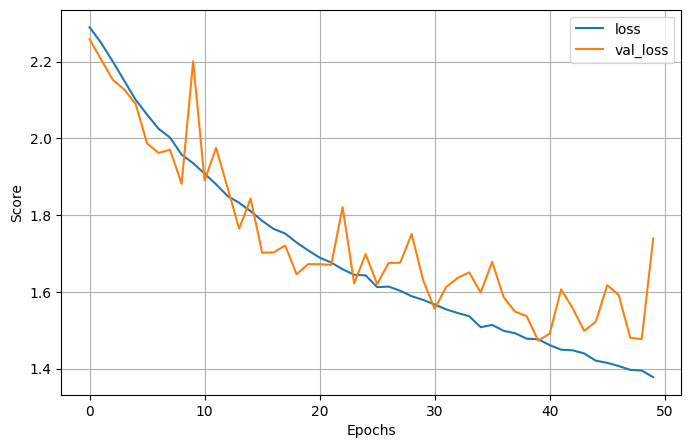

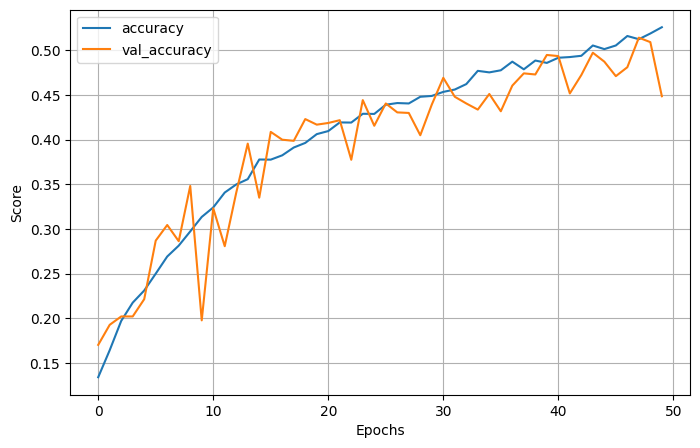

In [29]:
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
# plt.xticks(range(100))
plt.xlabel('Epochs')
plt.ylabel('Score')

history_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
# plt.xticks(range(100))
plt.xlabel('Epochs')
plt.ylabel('Score')

## 3. Evaluating and Predicting New Samples by using our Overfitted Model

#### **Evaluation**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#evaluate

In [30]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 1.4709 - accuracy: 0.4900


[1.4709490537643433, 0.49000000953674316]

#### **Prediction**
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict

In [31]:
y_test_proba = model.predict(X_test)
y_test_proba

63/63 [==============================] - 0s 2ms/step


array([[1.8863598e-01, 2.1660013e-02, 1.0036078e-02, ..., 1.0799756e-01,
        3.1200415e-02, 1.0992676e-02],
       [3.5727036e-04, 3.9525470e-03, 6.4764696e-04, ..., 6.9601615e-03,
        8.4225234e-04, 6.4483755e-03],
       [7.1458340e-02, 7.3060603e-03, 1.1762957e-01, ..., 2.9722238e-02,
        3.0703801e-03, 1.1230338e-01],
       ...,
       [4.7605699e-03, 3.4195473e-04, 9.6835172e-01, ..., 2.9166473e-05,
        2.2124924e-02, 1.0848861e-03],
       [7.7096242e-01, 2.5773298e-03, 3.6093311e-03, ..., 5.7331920e-03,
        1.8996103e-01, 1.8784158e-02],
       [5.8150567e-02, 2.9183936e-01, 7.4884713e-02, ..., 3.4459025e-02,
        2.5703296e-01, 3.4180384e-02]], dtype=float32)

#### **Class Prediction**
https://stackoverflow.com/a/69503180/7069696

In [32]:
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred

array([4, 5, 3, ..., 2, 0, 1])

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       200
           1       0.46      0.43      0.45       200
           2       0.47      0.45      0.46       200
           3       0.47      0.37      0.41       200
           4       0.44      0.28      0.34       200
           5       0.45      0.61      0.52       200
           6       0.44      0.59      0.50       200
           7       0.51      0.45      0.47       200
           8       0.54      0.67      0.60       200
           9       0.48      0.33      0.39       200

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.49      0.48      2000



We got a better accuracy than the model without **data augmentation**.